Using CNN model

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("legendahmed/alzheimermridataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1


In [4]:
import os
for dir,_,_ in os.walk(path):
    print(dir)

C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset\all image
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset\test
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset\test\MildDemented
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset\test\ModerateDemented
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset\test\NonDemented
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset\test\VeryMildDemented
C:\Users\Prem\.cache\kagglehub\datasets\legendahmed\alzheimermridataset\versions\1\Alzheimer_s Dataset

In [5]:
test_data=tf.keras.utils.image_dataset_from_directory(
    f"{path}\Alzheimer_s Dataset\\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

Found 1279 files belonging to 4 classes.


In [6]:
train_data=tf.keras.utils.image_dataset_from_directory(
    f"{path}\Alzheimer_s Dataset\\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

Found 5121 files belonging to 4 classes.


In [7]:
model=Sequential()

In [8]:
from tensorflow.keras.layers import BatchNormalization
model.add(Conv2D(filters=16,kernel_size=3,strides=(1, 1),padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=16,kernel_size=3,strides=(1, 1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=3,strides=(1, 1),padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,strides=(1, 1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=3,strides=(1, 1),padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,strides=(1, 1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128,kernel_size=3,strides=(1, 1),padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,strides=(1, 1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=256,kernel_size=3,strides=(1, 1),padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,strides=(1, 1),padding="same",activation="relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=1500,activation="relu"))
model.add(Dense(units=4,activation="softmax"))

In [9]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                        

In [11]:
model.fit(x=train_data,validation_data=test_data,epochs=25)

Epoch 1/25
161/161 [==============================] - 24s 70ms/step - loss: 1.0550 - accuracy: 0.4894 - val_loss: 1.1496 - val_accuracy: 0.5004
Epoch 2/25
161/161 [==============================] - 10s 62ms/step - loss: 0.9974 - accuracy: 0.5104 - val_loss: 1.0532 - val_accuracy: 0.5184
Epoch 3/25
161/161 [==============================] - 10s 62ms/step - loss: 0.9411 - accuracy: 0.5374 - val_loss: 1.0233 - val_accuracy: 0.5106
Epoch 4/25
161/161 [==============================] - 10s 62ms/step - loss: 0.9100 - accuracy: 0.5636 - val_loss: 0.9691 - val_accuracy: 0.5090
Epoch 5/25
161/161 [==============================] - 10s 62ms/step - loss: 0.8837 - accuracy: 0.5774 - val_loss: 0.9282 - val_accuracy: 0.5778
Epoch 6/25
161/161 [==============================] - 10s 61ms/step - loss: 0.8700 - accuracy: 0.5862 - val_loss: 0.9318 - val_accuracy: 0.5473
Epoch 7/25
161/161 [==============================] - 10s 62ms/step - loss: 0.8468 - accuracy: 0.6014 - val_loss: 1.0144 - val_accuracy:

In [12]:
model.evaluate(test_data)

40/40 [==============================] - 1s 19ms/step - loss: 1.0791 - accuracy: 0.6591


[1.0790618658065796, 0.6591086983680725]

In [13]:

# Download latest version
path1 = "C:\\Users\\Prem\\OneDrive\\Desktop\\notebook\\mritest"

print("Path to dataset files:", path1)

Path to dataset files: C:\Users\Prem\OneDrive\Desktop\notebook\mritest


In [14]:
import os
for dir,sub,file in os.walk(path1):
    print(file)

['mild1.jpg', 'mild2.jpg', 'moderate1.jpg', 'moderate2.jpg', 'no1.jpg', 'no2.png', 'no3.png', 'verymild1.jpg', 'verymild2.jpg']


In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = f"{path1}\\no3.png"
img = load_img(img_path, target_size=(128, 128))  # Resize to match input shape
img_array = img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
# img_array /= 255.0  # Normalize pixel values


In [16]:
predictions = model.predict(img_array)
for i, prob in enumerate(predictions[0]):
    print(f"Class {i}: {prob:.4f}")
   

1/1 [==============================] - 0s 179ms/step
Class 0: 0.0000
Class 1: 0.0000
Class 2: 1.0000
Class 3: 0.0000


In [17]:
output=np.argmax(predictions)
print(output)
if(output==2):
    print("Non-Demented")
else:
    print("Demented")

2
Non-Demented


Using Transfer Learning / VGG160 model

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub

# ✅ Download dataset
path = kagglehub.dataset_download("legendahmed/alzheimermridataset")
dataset_path = os.path.join(path, "Alzheimer_s Dataset", "train")

# ✅ Get class labels
class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)
class_to_index = {class_name: i for i, class_name in enumerate(class_names)}

# ✅ Collect image paths and labels
image_paths = []
labels = []

for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    for img_file in os.listdir(class_folder):
        image_paths.append(os.path.join(class_folder, img_file))
        labels.append(class_to_index[class_name])

# ✅ Convert labels to one-hot encoding with Label Smoothing
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)
labels = labels * 0.9 + 0.05  # Apply label smoothing

# ✅ Split dataset (80% Train, 20% Test)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

# ✅ Image Preprocessing Function
def extract_middle_brain(image):
    if image is None or image.shape[0] == 0 or image.shape[1] == 0:
        return np.zeros((128, 128, 3), dtype=np.float32)  # Handle missing images
    
    image = image.astype(np.uint8)  # Ensure uint8 format

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        x, y, w, h = cv2.boundingRect(contours[0])
        mid_x = x + w // 4
        mid_w = w // 2
        mid_roi = gray[y:y+h, mid_x:mid_x+mid_w]
        processed_image = cv2.resize(mid_roi, (128, 128))
        processed_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)
    else:
        processed_image = cv2.resize(image, (128, 128))

    return processed_image.astype(np.float32) / 255.0  # Normalize to 0-1

# ✅ Custom Data Generator with Improved Augmentation
class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size=16, augment=False):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.augment = augment
        self.datagen = ImageDataGenerator(
            rotation_range=15, width_shift_range=0.15, height_shift_range=0.15,
            horizontal_flip=True, zoom_range=0.15, shear_range=0.15
        )

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = []

        for image_path in batch_paths:
            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Missing image {image_path}")
                continue
            image = extract_middle_brain(image)
            batch_images.append(image)

        if len(batch_images) == 0:
            return np.zeros((self.batch_size, 128, 128, 3)), np.zeros((self.batch_size, num_classes))

        batch_images = np.array(batch_images, dtype=np.float32)

        if self.augment:
            batch_images = next(self.datagen.flow(batch_images, batch_size=self.batch_size, shuffle=False))

        return batch_images, np.array(batch_labels)

    def on_epoch_end(self):
        indices = np.arange(len(self.image_paths))
        np.random.shuffle(indices)
        self.image_paths = [self.image_paths[i] for i in indices]
        self.labels = [self.labels[i] for i in indices]

# ✅ Load Pre-trained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# ✅ Freeze all layers except last 10
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

# ✅ Add Custom Classifier with Batch Normalization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='swish', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# ✅ Define Model
model = Model(inputs=base_model.input, outputs=predictions)

# ✅ Implement Focal Loss to Handle Class Imbalance
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.keras.backend.clip(y_pred, 1e-7, 1 - 1e-7)
        ce_loss = -y_true * tf.keras.backend.log(y_pred)
        weight = alpha * y_true * tf.keras.backend.pow((1 - y_pred), gamma)
        return tf.keras.backend.sum(weight * ce_loss, axis=-1)
    return loss

# ✅ Compile the Model with AdamW Optimizer
model.compile(optimizer=tf.keras.optimizers.experimental.AdamW(learning_rate=2e-5, weight_decay=1e-4),
              loss=focal_loss(),
              metrics=['accuracy'])
# ✅ Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-7)

# ✅ Create Data Generators
train_data = CustomDataGenerator(train_paths, train_labels, batch_size=16, augment=True)
test_data = CustomDataGenerator(test_paths, test_labels, batch_size=16, augment=False)

# ✅ Train the Model with Cosine Decay LR Scheduler
cosine_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=2e-5, decay_steps=50, alpha=0.01
)

history = model.fit(
    train_data,
    epochs=40,
    validation_data=test_data,
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate the Model
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/40
256/256 [==============================] - 68s 145ms/step - loss: 0.8241 - accuracy: 0.4299 - val_loss: 0.7823 - val_accuracy: 0.4946 - lr: 2.0000e-05
Epoch 2/40
256/256 [==============================] - 34s 134ms/step - loss: 0.7230 - accuracy: 0.5500 - val_loss: 0.6753 - val_accuracy: 0.5873 - lr: 2.0000e-05
Epoch 3/40
256/256 [==============================] - 35s 135ms/step - loss: 0.6410 - accuracy: 0.5881 - val_loss: 0.6698 - val_accuracy: 0.5015 - lr: 2.0000e-05
Epoch 4/40
256/256 [==============================] - 35s 135ms/step - loss: 0.5672 - accuracy: 0.6191 - val_loss: 0.7554 - val_accuracy: 0.3493 - lr: 2.0000e-05
Epoch 5/40
256/256 [==============================] - 35s 137ms/step - loss: 0.4984 - accuracy: 0.6523 - val_loss: 0.4607 - val_accuracy: 0.7015 - lr: 2.0000e-05
Epoch 6/40
256/256 [==============================] - 35s 137ms/step - loss: 0.4378 - accuracy: 0.6873 - val_loss: 0.4964 - val_accuracy: 0.4946 - lr: 2.0000e-05
Epoch 7/40
256/256 [========

In [3]:
keras_model=model.save("fresh_ker.keras")

In [4]:
check = tf.keras.models.load_model("fresh_ker.keras", compile=False)
print("Keras model loaded successfully!")



Keras model loaded successfully!


Saving the model


In [38]:
import tensorflow as tf
import tf2onnx
import onnx
import numpy as np
import os
import onnxruntime as ort

MODEL_PATH = "fresh_ker.keras"
ONNX_PATH = "new_Alzheimer.onnx"

# Check if the model file exists before loading
if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file '{MODEL_PATH}' not found! Please check the path.")
    exit(1)

# Load Keras model safely
try:
    keras_model = tf.keras.models.load_model(MODEL_PATH, compile=False)
    print("Model loaded successfully!")
    
    # Ensure softmax is present in output
    if not isinstance(keras_model.layers[-1], tf.keras.layers.Softmax):
        keras_model = tf.keras.Sequential(keras_model.layers + [tf.keras.layers.Softmax()])
        print("Added Softmax layer to the model.")
        
except Exception as e:
    print(f"Error loading Keras model: {e}")
    exit(1)

# Print model summary for debugging
keras_model.summary()

# Define input signature with correct shape
input_shape = keras_model.input_shape[1:]
spec = (tf.TensorSpec(shape=[None, *input_shape], dtype=tf.float32, name="input"),)

# Convert to ONNX
try:
    onnx_model, _ = tf2onnx.convert.from_keras(
        keras_model, 
        input_signature=spec, 
        opset=13  # Ensure compatibility with ONNX runtime
    )
    
    # Save the ONNX model
    onnx.save_model(onnx_model, ONNX_PATH)
    print(f"ONNX model saved successfully at '{ONNX_PATH}'!")
except Exception as e:
    print(f"Error converting to ONNX: {e}")
    exit(1)




Model loaded successfully!
Added Softmax layer to the model.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                           

In [61]:
import onnxruntime as ort
import numpy as np
import cv2
try:
    ort_session = ort.InferenceSession(ONNX_PATH, providers=["CPUExecutionProvider"])
    print("ONNX Model loaded successfully in ONNX Runtime!")
except Exception as e:
    print(f"Error loading ONNX Model: {e}")
    exit(1)

# Test inference to ensure output correctness
def preprocess_input(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=input_shape[:2])
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize
    return img_array.astype(np.float32)

test_image = "C:\\Users\\Prem\\OneDrive\\Desktop\\notebook\\mritest\\moderate1.jpg"  # Replace with an actual test image path
if os.path.exists(test_image):
    input_data = preprocess_input(test_image)

    # Run inference on ONNX
    onnx_outputs = ort_session.run(None, {ort_session.get_inputs()[0].name: input_data})
    print("ONNX Output:", onnx_outputs)
    print("Predicted Class (ONNX):", np.argmax(onnx_outputs[0]))

    # Run inference on Keras for comparison
    keras_outputs = check.predict(input_data)
    print("Keras Output:", keras_outputs)
    print("Predicted Class (Keras):", np.argmax(keras_outputs))

    # Check if ONNX and Keras predictions match
    if np.argmax(onnx_outputs[0]) == np.argmax(keras_outputs):
        print("ONNX and Keras Predictions Match ✅")
    else:
        print("Mismatch between ONNX and Keras Predictions ❌")

else:
    print("Test image not found. Skipping inference test.")

ONNX Model loaded successfully in ONNX Runtime!
ONNX Output: [array([[0.17731638, 0.1795236 , 0.1772574 , 0.4659026 ]], dtype=float32)]
Predicted Class (ONNX): 3
1/1 [==============================] - 0s 27ms/step
Keras Output: [[0.00549343 0.01792365 0.00516732 0.9714156 ]]
Predicted Class (Keras): 3
ONNX and Keras Predictions Match ✅


In [18]:

# Download latest version
path1 = "C:\\Users\\Prem\\OneDrive\\Desktop\\notebook\\mritest"

print("Path to dataset files:", path1)
import os
for dir,sub,file in os.walk(path1):
    print(file)

Path to dataset files: C:\Users\Prem\OneDrive\Desktop\notebook\mritest
['mild1.jpg', 'mild2.jpg', 'moderate1.jpg', 'moderate2.jpg', 'no1.jpg', 'no2.png', 'no3.png', 'verymild1.jpg', 'verymild2.jpg']


In [17]:
predictions = model.predict(img_array)
for i, prob in enumerate(predictions[0]):
    print(f"Class {i}: {prob:.4f}")
   

NameError: name 'img_array' is not defined

In [19]:
output=np.argmax(predictions)
print(output)
if(output==0):
    print("Mild Demented")
elif(output==1):
    print("Moderate Demented")
elif(output==2):
    print("Non Demented")
elif(output==3):
    print("Very Mild Demented")

TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.

1/1 [==============================] - 0s 21ms/step


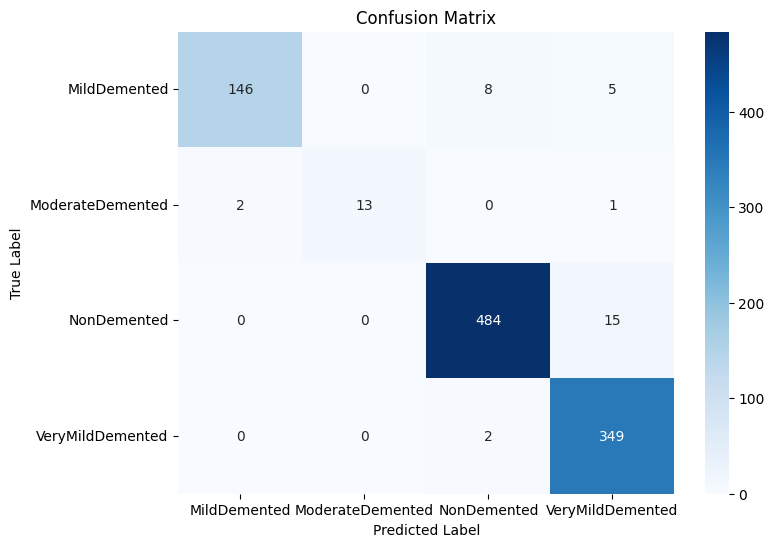

Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.99      0.92      0.95       159
ModerateDemented       1.00      0.81      0.90        16
     NonDemented       0.98      0.97      0.97       499
VeryMildDemented       0.94      0.99      0.97       351

        accuracy                           0.97      1025
       macro avg       0.98      0.92      0.95      1025
    weighted avg       0.97      0.97      0.97      1025



In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Get true labels and predictions
true_labels = []
pred_labels = []

for images, labels in test_data:
    preds = model.predict(images)
    pred_labels.extend(np.argmax(preds, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

# ✅ Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
class_names = list(class_to_index.keys())

# ✅ Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification report
report = classification_report(true_labels, pred_labels, target_names=class_names)
print("Classification Report:\n", report)


Code for test multiple mri scan

Path to dataset files: C:\Users\Prem\OneDrive\Desktop\notebook\mritest
Found 9 MRI images.
1/1 [==============================] - 0s 26ms/step


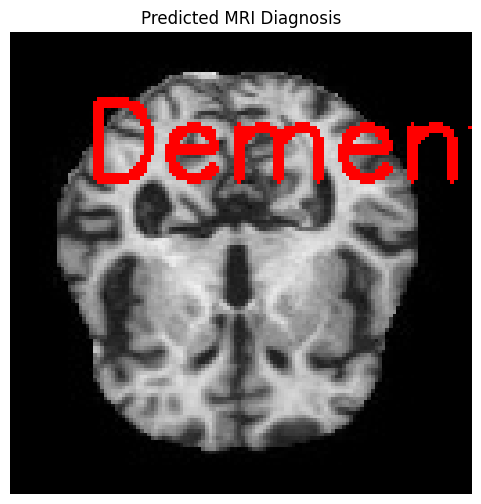

Image: mild1.jpg | Predicted: Dementia | Confidence: 92.82%
1/1 [==============================] - 0s 23ms/step


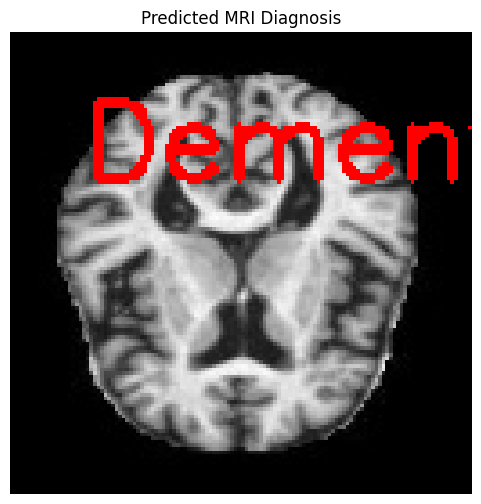

Image: mild2.jpg | Predicted: Dementia | Confidence: 81.75%
1/1 [==============================] - 0s 28ms/step


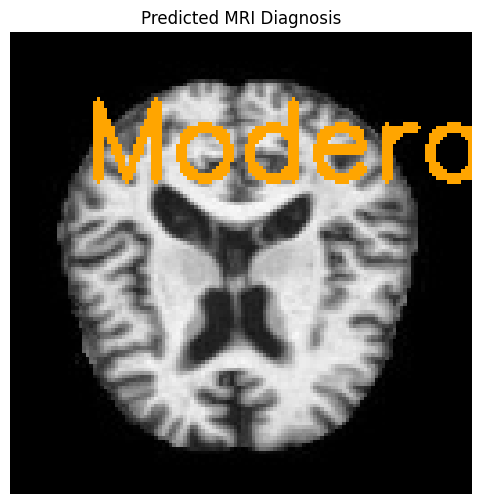

Image: moderate1.jpg | Predicted: ModerateDementia | Confidence: 90.90%
1/1 [==============================] - 0s 28ms/step


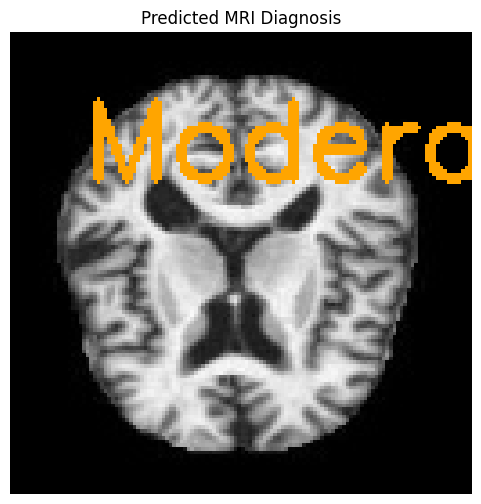

Image: moderate2.jpg | Predicted: ModerateDementia | Confidence: 93.57%
1/1 [==============================] - 0s 30ms/step


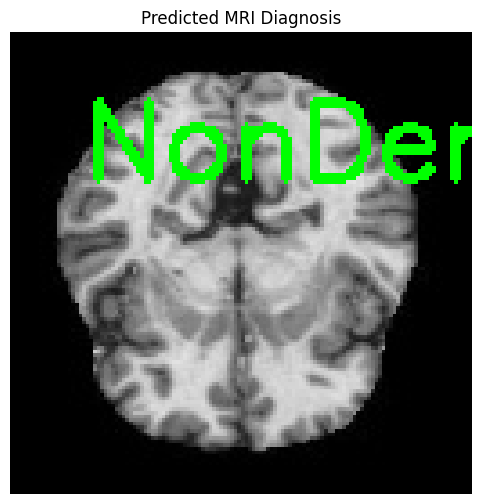

Image: no1.jpg | Predicted: NonDementia | Confidence: 96.65%
1/1 [==============================] - 0s 25ms/step


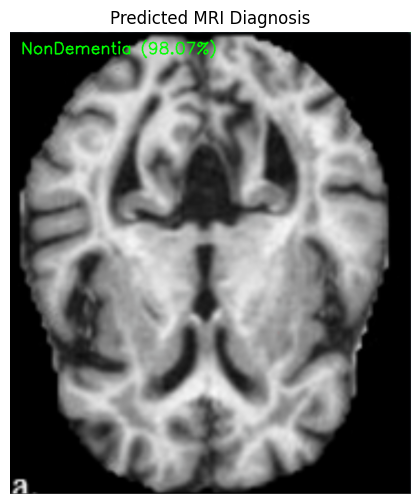

Image: no2.png | Predicted: NonDementia | Confidence: 98.07%
1/1 [==============================] - 0s 28ms/step


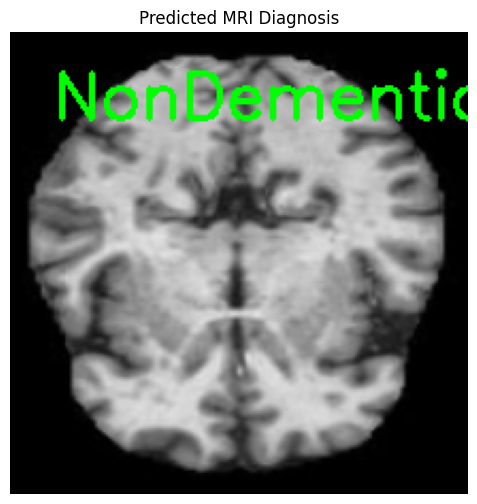

Image: no3.png | Predicted: NonDementia | Confidence: 90.71%
1/1 [==============================] - 0s 26ms/step


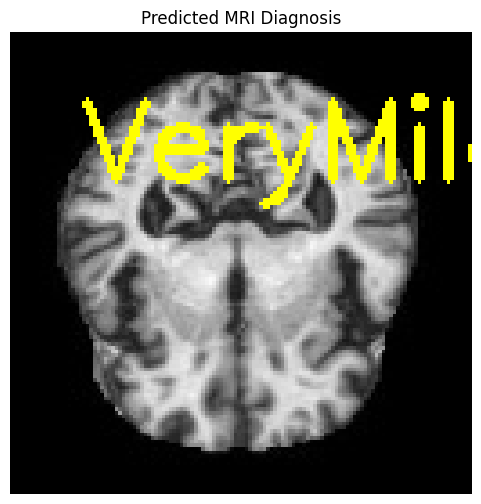

Image: verymild1.jpg | Predicted: VeryMildDementia | Confidence: 97.08%
1/1 [==============================] - 0s 27ms/step


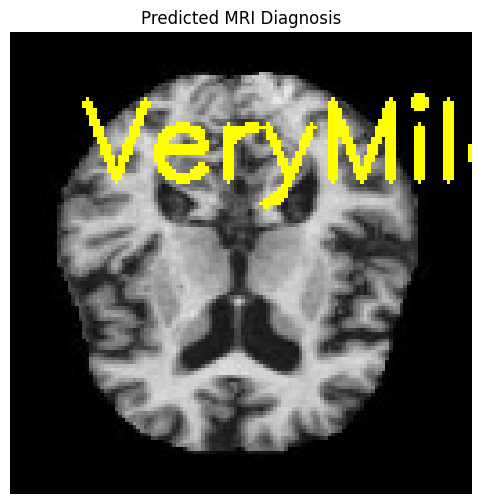

Image: verymild2.jpg | Predicted: VeryMildDementia | Confidence: 82.47%


In [58]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt

# Load trained model (Ensure correct model path)
# model_path = "alzheimers_model.h5"  # Update with correct path
# model = load_model(model_path)

# Define class labels and color-coding
class_labels = ['Dementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
class_colors = {
    'Dementia': (255, 0, 0),         # Red
    'ModerateDementia': (255, 165, 0), # Orange
    'NonDementia': (0, 255, 0),       # Green
    'VeryMildDementia': (255, 255, 0) # Yellow
}

def preprocess_image(image_path):
    """Preprocess MRI image: Convert to grayscale, crop, resize, and normalize."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error: Cannot read image at {image_path}")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Thresholding for better contour detection
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Find the largest contour (assumed to be the brain region)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        x, y, w, h = cv2.boundingRect(contours[0])

        # Focus on the central region of the brain
        mid_x = x + w // 4
        mid_w = w // 2
        mid_roi = gray[y:y+h, mid_x:mid_x+mid_w]

        processed_image = cv2.resize(mid_roi, (128, 128))  # Resize to match model input
    else:
        # If no contours are found, resize the original image
        processed_image = cv2.resize(gray, (128, 128))  

    # Convert to float32 before normalizing
    processed_image = processed_image.astype(np.float32) / 255.0  

    # Convert grayscale image to RGB properly
    processed_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)

    return np.expand_dims(processed_image, axis=0)  # Add batch dimension

def predict_and_visualize(image_path):
    """Predict Alzheimer's stage from an MRI image and visualize it with labels."""
    image = preprocess_image(image_path)
    prediction = check.predict(image)
    
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Load original image for visualization
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Get color for the predicted class
    label_color = class_colors.get(predicted_class, (255, 255, 255))  # Default white if not found

    # Add prediction text with color
    text = f"{predicted_class} ({confidence:.2f}%)"
    cv2.putText(original_image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, label_color, 2)

    # Display image
    plt.figure(figsize=(6,6))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title("Predicted MRI Diagnosis")
    plt.show()

    return predicted_class, confidence

# Path to dataset (Ensure this path is correct)
path1 = "C:\\Users\\Prem\\OneDrive\\Desktop\\notebook\\mritest"
print("Path to dataset files:", path1)

# Collect images (Ignore labels since no subfolders exist)
test_images = [os.path.join(path1, file) for file in os.listdir(path1) if file.endswith((".jpg", ".png"))]

if not test_images:
    print("No images found in the dataset folder!")
else:
    print(f"Found {len(test_images)} MRI images.")

# Run predictions for all images
for img_path in test_images:
    predicted_class, confidence = predict_and_visualize(img_path)
    print(f"Image: {os.path.basename(img_path)} | Predicted: {predicted_class} | Confidence: {confidence:.2f}%")


Code for prediction of mri brain image

1/1 [==============================] - 0s 29ms/step


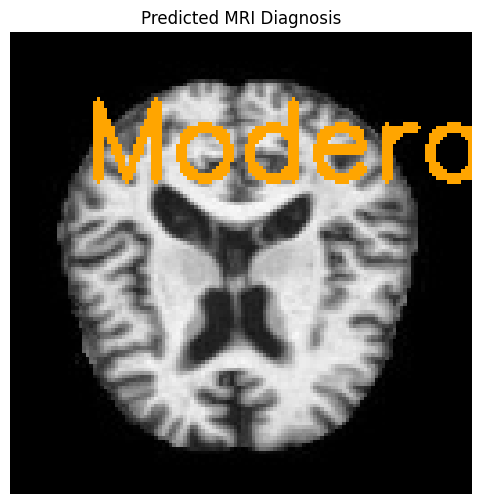

Predicted: ModerateDementia | Confidence: 90.90%


In [59]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load trained model (Ensure correct model path)
# model_path = "alzheimers_model.h5"  # Update with correct path
# model = load_model(model_path)

# Define class labels and color-coding
class_labels = ['Dementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
class_colors = {
    'Dementia': (255, 0, 0),         # Red
    'ModerateDementia': (255, 165, 0), # Orange
    'NonDementia': (0, 255, 0),       # Green
    'VeryMildDementia': (255, 255, 0) # Yellow
}

def preprocess_image(image_path):
    """Preprocess a single MRI image for model prediction."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error: Cannot read image at {image_path}")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Thresholding for better contour detection
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Find the largest contour (assumed to be the brain region)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        x, y, w, h = cv2.boundingRect(contours[0])

        # Focus on the central region of the brain
        mid_x = x + w // 4
        mid_w = w // 2
        mid_roi = gray[y:y+h, mid_x:mid_x+mid_w]

        processed_image = cv2.resize(mid_roi, (128, 128))  # Resize to match model input
    else:
        processed_image = cv2.resize(gray, (128, 128))  # Default resize if no contours found

    # Convert to float32 before normalizing
    processed_image = processed_image.astype(np.float32) / 255.0  

    # Convert grayscale image to RGB (if model expects 3 channels)
    processed_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)

    return np.expand_dims(processed_image, axis=0)  # Add batch dimension

def predict_single_image(image_path):
    """Predict Alzheimer's stage for a single MRI image and visualize it."""
    image = preprocess_image(image_path)
    prediction = check.predict(image)
    
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Load original image for visualization
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Get color for the predicted class
    label_color = class_colors.get(predicted_class, (255, 255, 255))  # Default white if not found

    # Add prediction text with color
    text = f"{predicted_class} ({confidence:.2f}%)"
    cv2.putText(original_image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, label_color, 2)

    # Display image
    plt.figure(figsize=(6,6))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title("Predicted MRI Diagnosis")
    plt.show()

    return predicted_class, confidence

# Provide the path to a single MRI image
image_path = "C:\\Users\\Prem\\OneDrive\\Desktop\\notebook\\mritest\\moderate1.jpg"  # Update this with the actual path

# Run the prediction
predicted_class, confidence = predict_single_image(image_path)
print(f"Predicted: {predicted_class} | Confidence: {confidence:.2f}%")


✅ Keras model loaded successfully!
✅ ONNX model loaded successfully!
1/1 [==============================] - 0s 176ms/step

🔍 **Prediction Results** 🔍
🎯 **Keras Prediction:** VeryMildDementia | Confidence: 97.08%
🤖 **ONNX Prediction:** VeryMildDementia | Confidence: 46.57%
✅ ONNX and Keras Predictions Match!


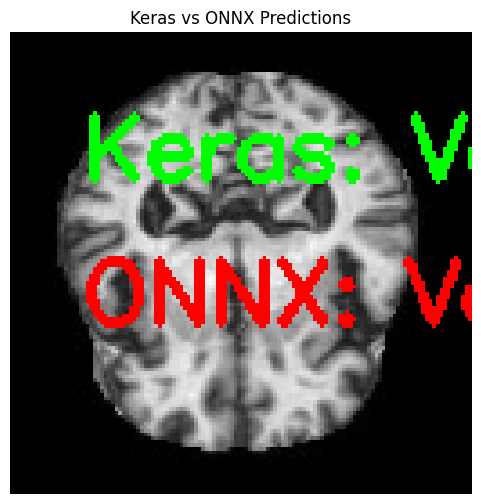

In [72]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import onnxruntime as ort
import os
import matplotlib.pyplot as plt

# Paths to models
KERAS_MODEL_PATH = "fresh_ker.keras"  # Update with actual path
ONNX_MODEL_PATH = "new_Alzheimer.onnx"

# Load Keras model
try:
    keras_model = load_model(KERAS_MODEL_PATH, compile=False)
    print("✅ Keras model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading Keras model: {e}")
    exit(1)

# Load ONNX model
try:
    ort_session = ort.InferenceSession(ONNX_MODEL_PATH, providers=["CPUExecutionProvider"])
    print("✅ ONNX model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading ONNX model: {e}")
    exit(1)

# Define class labels
class_labels = ['Dementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

def preprocess_image(image_path):
    """Preprocess an MRI image for both Keras and ONNX models."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error: Cannot read image at {image_path}")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding for better contour detection
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        x, y, w, h = cv2.boundingRect(contours[0])

        # Crop the central brain region
        mid_x = x + w // 4
        mid_w = w // 2
        mid_roi = gray[y:y+h, mid_x:mid_x+mid_w]

        processed_image = cv2.resize(mid_roi, (128, 128))
    else:
        processed_image = cv2.resize(gray, (128, 128))

    # Convert grayscale image to RGB format (if model expects 3 channels)
    processed_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)
    
    # Normalize and reshape for model input
    processed_image = processed_image.astype(np.float32) / 255.0
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension
    return processed_image

# Path to the test image
test_image = "C:\\Users\\Prem\\OneDrive\\Desktop\\notebook\\mritest\\verymild1.jpg"

if os.path.exists(test_image):
    input_data = preprocess_image(test_image)

    # Predict using Keras
    keras_outputs = keras_model.predict(input_data)
    keras_predicted_class_index = np.argmax(keras_outputs)
    keras_predicted_class = class_labels[keras_predicted_class_index]
    keras_confidence = np.max(keras_outputs) * 100

    # Predict using ONNX
    input_name = ort_session.get_inputs()[0].name
    onnx_outputs = ort_session.run(None, {input_name: input_data})
    onnx_predicted_class_index = np.argmax(onnx_outputs[0])
    onnx_predicted_class = class_labels[onnx_predicted_class_index]
    onnx_confidence = np.max(onnx_outputs[0]) * 100

    # Print predictions
    print("\n🔍 **Prediction Results** 🔍")
    print(f"🎯 **Keras Prediction:** {keras_predicted_class} | Confidence: {keras_confidence:.2f}%")
    print(f"🤖 **ONNX Prediction:** {onnx_predicted_class} | Confidence: {onnx_confidence:.2f}%")

    # Check if predictions match
    if keras_predicted_class_index == onnx_predicted_class_index:
        print("✅ ONNX and Keras Predictions Match!")
    else:
        print("❌ ONNX and Keras Predictions Do NOT Match!")

    # Visualize the image with predicted labels
    original_image = cv2.imread(test_image)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    text_keras = f"Keras: {keras_predicted_class} ({keras_confidence:.2f}%)"
    text_onnx = f"ONNX: {onnx_predicted_class} ({onnx_confidence:.2f}%)"
    
    cv2.putText(original_image, text_keras, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.putText(original_image, text_onnx, (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Show image with predictions
    plt.figure(figsize=(6,6))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title("Keras vs ONNX Predictions")
    plt.show()

else:
    print("❌ Test image not found. Skipping inference test.")
